<a href="https://colab.research.google.com/github/deepshikhaa07/Titanic-Survival-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic survival prediction Project

## Author: Deepshikha Singh

## Installing and importing packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import joblib

## Dataset

In [ ]:
#import dataset
titanic_data = pd.read_csv('/content/titanic_dataset.csv')

In [ ]:
#show dataset
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#show first five rows of dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## dataset description

In [ ]:
#datatype explanantion of the dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
#dataset description
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# dataset size
titanic_data.shape

(418, 12)

## data cleaning

In [ ]:
# checking null values
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
# filling null values with mean value of that column
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(),inplace=True)

<ipython-input-9-27b540e136e5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)
<ipython-input-9-27b540e136e5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## data visualisation

In [ ]:
# Drop non-numeric columns before calculating correlation

titanic_data_numeric = titanic_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

<ipython-input-16-ebf9fedf1d6d>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data_numeric['Embarked'].fillna('Unknown', inplace=True) # Fill NaN or empty strings if any


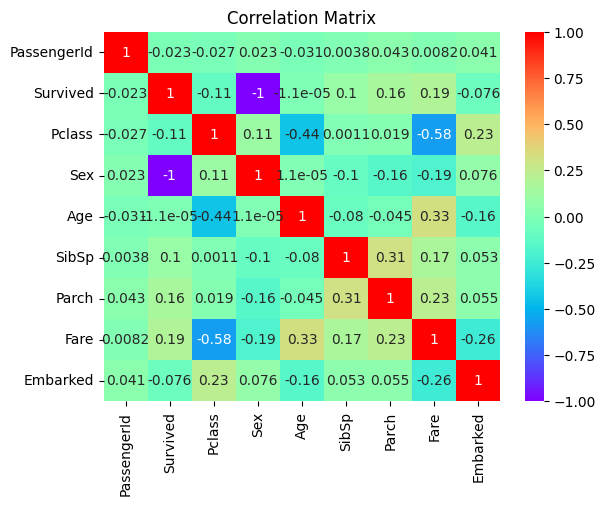

In [ ]:
# Apply Label Encoding to 'Sex' and 'Embarked' before calculating correlation
label_encoder = LabelEncoder()
titanic_data_numeric['Sex'] = label_encoder.fit_transform(titanic_data_numeric['Sex'])

# Handle potential non-numeric values in 'Embarked' before encoding
# Convert any non-string values to string first, then handle NaNs
titanic_data_numeric['Embarked'] = titanic_data_numeric['Embarked'].astype(str)
titanic_data_numeric['Embarked'].fillna('Unknown', inplace=True) # Fill NaN or empty strings if any
titanic_data_numeric['Embarked'] = label_encoder.fit_transform(titanic_data_numeric['Embarked'])


#correlation matrix calculation

# Calculate correlation matrix on the numeric data
titanic_data_numeric.corr()

#correlation matrix represented as a heatmap
sns.heatmap(titanic_data_numeric.corr(),annot=True,cmap='rainbow')
plt.title('Correlation Matrix')
plt.show()

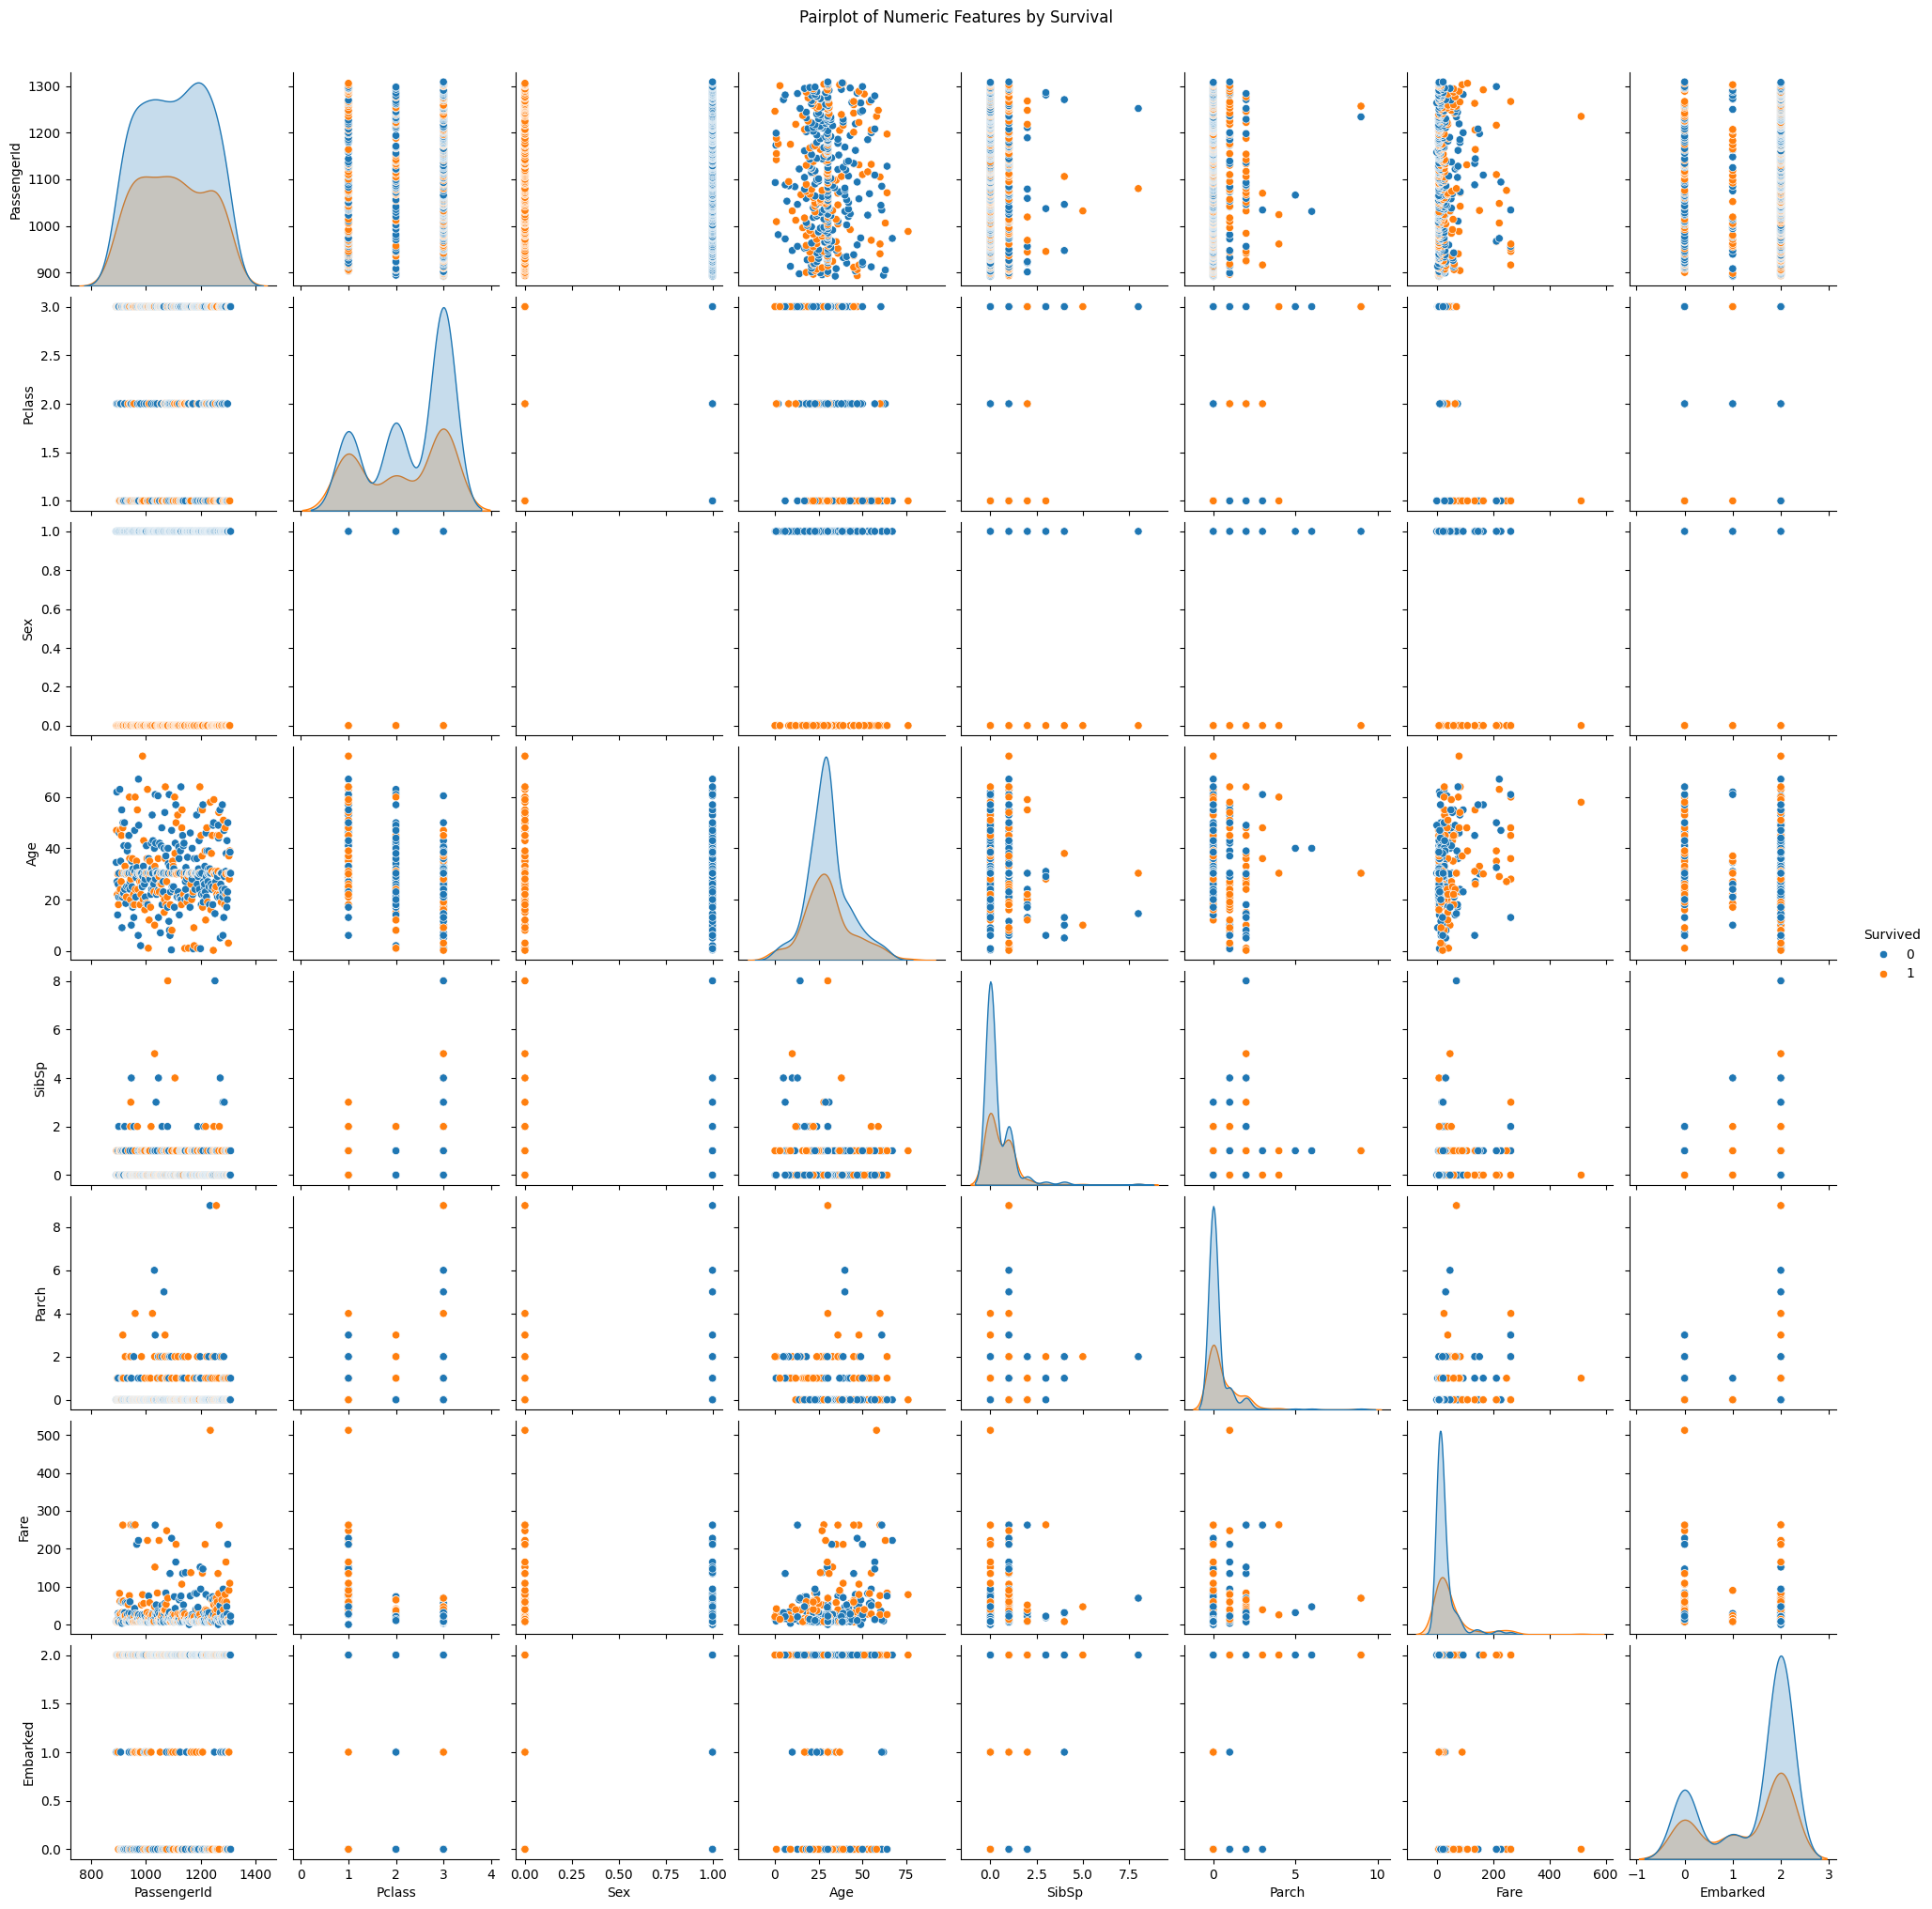

In [ ]:
# pairplot to visualize relationships between numerical features

sns.pairplot(titanic_data_numeric, hue='Survived')
plt.suptitle('Pairplot of Numeric Features by Survival', y=1.02)
plt.show()

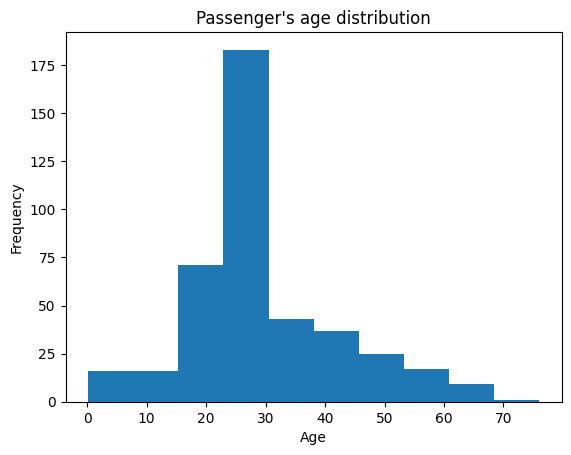

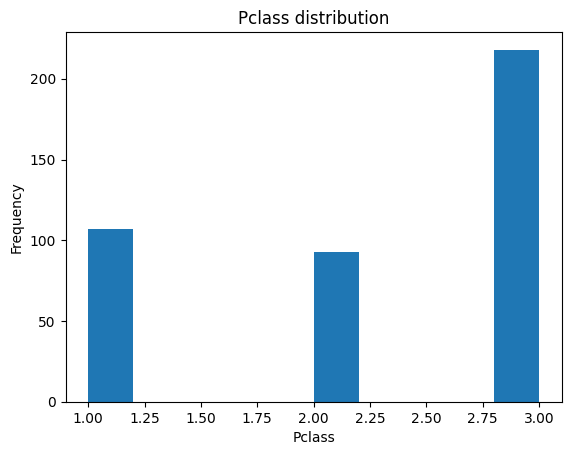

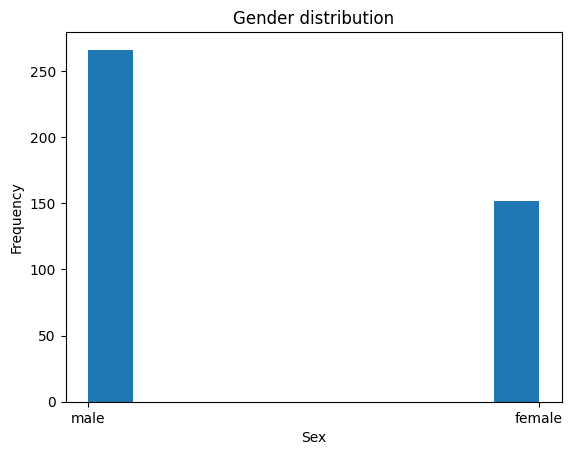

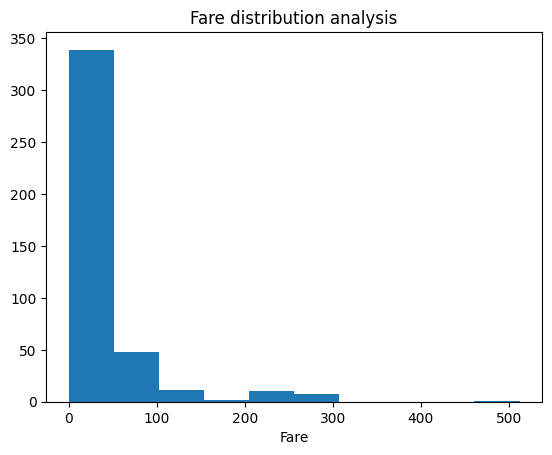

In [ ]:
# Analyzing dataset parameters

plt.hist(titanic_data['Age'])
plt.title("Passenger's age distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.hist(titanic_data['Pclass'])
plt.title("Pclass distribution")
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.show()

plt.hist(titanic_data['Sex'])
plt.title("Gender distribution")
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

plt.hist(titanic_data['Fare'])
plt.title("Fare distribution analysis")
plt.xlabel('Fare')
plt.show()

In [ ]:
# calculating target(survival) count
titanic_data['Survived'].value_counts()

,count
Survived,
0,266
1,152


Text(0.5, 1.0, 'Survival rate of passengers')

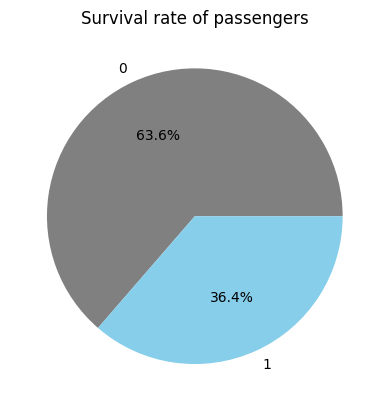

In [ ]:
unique, counts = np.unique(titanic_data['Survived'], return_counts=True)

# Create pie chart
plt.pie(counts, labels=['0', '1'], autopct='%1.1f%%', colors=['grey', 'skyblue'])
plt.title('Survival rate of passengers')

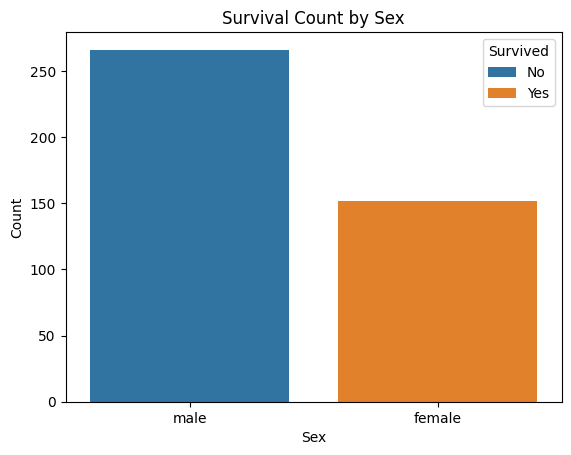

In [ ]:
sns.countplot(x=titanic_data['Sex'],hue=titanic_data['Survived'])
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

## data splitting

In [ ]:
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

In [ ]:
#seperating data
x = titanic_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']

In [ ]:
print(x)

     PassengerId  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0            892       3    1  34.50000      0      0    7.8292         1
1            893       3    0  47.00000      1      0    7.0000         2
2            894       2    1  62.00000      0      0    9.6875         1
3            895       3    1  27.00000      0      0    8.6625         2
4            896       3    0  22.00000      1      1   12.2875         2
..           ...     ...  ...       ...    ...    ...       ...       ...
413         1305       3    1  30.27259      0      0    8.0500         2
414         1306       1    0  39.00000      0      0  108.9000         0
415         1307       3    1  38.50000      0      0    7.2500         2
416         1308       3    1  30.27259      0      0    8.0500         2
417         1309       3    1  30.27259      1      1   22.3583         0

[418 rows x 8 columns]


In [ ]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [ ]:
#spliting of data

#train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=3)

## logistic regression

In [ ]:
# Create a logistic regression model
logistic_model = LogisticRegression()

# Fit the model to the training data
logistic_model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logistic_model.predict(x_test)

In [ ]:
print(y_pred)

[0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0
 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0
 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0
 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1]


## evaluate the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


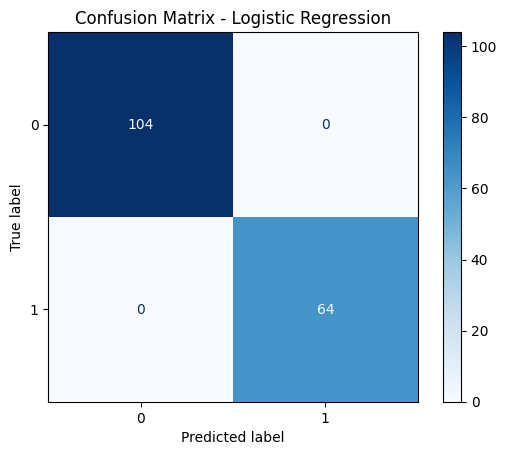

In [ ]:
# confusion matrix

y_pred = logistic_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        64

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168



## test model

### method-1

In [ ]:
# providing input
new_data = pd.DataFrame({
    'PassengerId': [0], # Add a dummy PassengerId
    'Pclass': [3],
    'Sex': [0],
    'Age': [47],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [7.0],
    'Embarked': [2],
})
print(new_data)

   PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0            0       3    0   47      1      0   7.0         2


In [ ]:
# predict survival
prediction = logistic_model.predict(new_data)

# output prediction
print(prediction)
print('Prediction:', 'Survived' if prediction[0] == 1 else 'Did not survive')

[1]
Prediction: Survived


In [ ]:
new_data1 = pd.DataFrame({
    'PassengerId': [0], # Add a dummy PassengerId
    'Pclass': [2],
    'Sex': [1],
    'Age': [22],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [45],
    'Embarked': [1],
})
print(new_data1)

   PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0            0       2    1   22      1      0    45         1


In [ ]:
# predict survival
prediction = logistic_model.predict(new_data1)

# output prediction
print(prediction)
print('Prediction:', 'Survived' if prediction[0] == 1 else 'Did not survive')

[0]
Prediction: Did not survive


### method-2

In [ ]:
# Selecting an input from the dataset
input_data1 = x.iloc[0]
input_data2 = x.iloc[1]

print("data input[1]:")
print()
print(input_data1)
print()
print("data input[2]:")
print()
print(input_data2)

data input[1]:

PassengerId    892.0000
Pclass           3.0000
Sex              1.0000
Age             34.5000
SibSp            0.0000
Parch            0.0000
Fare             7.8292
Embarked         1.0000
Name: 0, dtype: float64

data input[2]:

PassengerId    893.0
Pclass           3.0
Sex              0.0
Age             47.0
SibSp            1.0
Parch            0.0
Fare             7.0
Embarked         2.0
Name: 1, dtype: float64


In [ ]:
# Predict survival
prediction1 = logistic_model.predict([input_data1])
prediction2 = logistic_model.predict([input_data2])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Output prediction
print(prediction1)
print("Prediction of data input[1]:", "Survived" if prediction1[0] == 1 else "Did not survive")
print(prediction2)
print("Prediction of data input[2]:", "Survived" if prediction2[0] == 1 else "Did not survive")

[0]
Prediction of data input[1]: Did not survive
[1]
Prediction of data input[2]: Survived


## Saving my model

In [ ]:
# Save your logistic regression model

joblib.dump(logistic_model, 'logistic_model_titanic.pkl')

['logistic_model_titanic.pkl']

In [ ]:
from google.colab import files
files.download('logistic_model_titanic.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>